<h1 align='center'> Descriptive statistics </h1>

<h2> Introduction </h2>

Statistics is defined as the discipline that is in charge of studying data structure to analyse and get insights from it, and therefore it is a core knowledge for a data scientist, and basically any applied science. First, we start with the foundations of statistics, which are the techniques to describe any piece of data.

<h2> Central Tendency Measures </h2>

A measure of central tendency is a single value that pretends to describe a whole set of measures by identifying the central location towards which the complete data is located. As an example we can take a look at the following piece of data and we represent each observation in a single dot in a graph:

import matplotlib.pyplot as plt

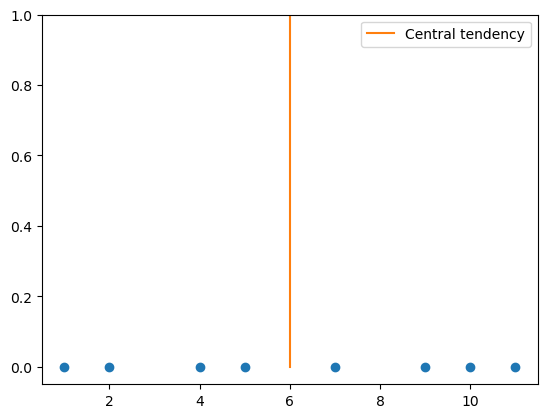

In [16]:
x = [1, 2, 4, 5, 7, 9, 10, 11]
y = [0,0,0,0,0,0,0, 0]

plt.plot(x,y, 'o')
plt.ylim(-0.05, 1)
plt.plot([6,6], [0, 1], label='Central tendency')
plt.legend()

At looking at the location of each point we could be tempted to identify the value 6 as being the central tendency, since there is the same number of measures at each side of this location. However, we first need to define how a central tendency should be computed.

<h3> Arithmetic mean </h3>

By far the most used measure of central tendency is the arithmetic mean, which consists on a linear combination of all the single values of the data. Let $\mathbf{x} = \left(x_{1}, x_{2}, ..., x_{n} \right)$ be a vector of $n$ measures of some variable, then we define the arithmetic mean $\bar{x}$ as:

$$\bar{x} = \frac{x_{1} + x_{2} + ... + x_{n}}{n}$$

Using linear algebra, we could write this expression using the scalar product notation as:

$$\bar{x} = \frac{1}{n} \mathbf{x} \cdot \iota $$

where $\iota = \left(1, 1, ..., 1 \right)$.

For example, let's write a function to compute the arithmetic mean of a given vector, and use it to the $x$ vector we previously defined:

In [19]:
import numpy as np

def arithmetic_mean(x):
    
    n = len(x)
    return np.sum(x)/n

arithmetic_mean(x)

6.125

However, we need not to define this function from scratch (we did it just as a didactic exercise) since `numpy` as `mean` function that does this for us:

In [20]:
np.mean(x)

6.125

<h3> Weighted mean </h3>

A modification of the arithmetic mean is the weighted mean, which assumes that each observation in $\mathbf{x}$ has a different weight of importance in the data set. We express such measure as:

$$W =  \frac{\mathbf{x} \cdot \mathbf{w}}{\mathbf{w} \cdot \iota} = \frac{w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}}{w_{1} + w_{1} + ... + w_{n}}$$

where $\mathbf{w} = \left(w_{1}, w_{2}, ..., w_{n} \right)$, $w_{i}$ is the weight of the the measure $i$, $w_{i}>0$.

Let's program this function:

In [22]:
def weighted_mean(x, w):
    
    return np.dot(x, w)/np.sum(w)

w = [2,2,5,7,3,5,7,8]

weighted_mean(x, w)

7.3076923076923075

The same as with the arithmetic mean `numpy` as a function for the weighted mean:

In [23]:
np.average(x, weights=w)

7.3076923076923075

<h3> Median </h3>

Although the arithmetic mean and the weighted mean seem to be two reasonable ways of finding a central tendency since they use the information of all the measures of the variable $\mathbf{x}$ it is sensible to extreme values, see what happens when we add a very large number to the vector we have previously defined:

In [24]:
x.append(100)
np.mean(x)

16.555555555555557

To overcome this issue we can define a meassure that is not affected by extreme values. For example, we can do what we did in the first figure we saw, and set the central tendency to be the value that has the same number of data points to each side of it: this meassure is called the median.

The median is computed in two steps, first we sort the data values in ascending values:

In [29]:
import pandas as pd

pd.DataFrame(np.sort(x)).T

,0,1,2,3,4,5,6,7,8
0,1,2,4,5,7,9,10,11,100


The second step consists on finding the value that splits the dataset into two equal-sized subsets. If the number of observations of the $n$ measures is an odd number, then the median is the value at location $(n+1)/2$, if the number of observations is an even number, then the median is the arithmetic mean between values at position $n/2$ and position $n/2 + 1$, this is:

$$M = \begin{cases}
x_{(n+1)/2} & \text{ if } n \text{ is odd} \\ 
\frac{x_{(n+1)/2} + x_{(n+1)/2 + 1}}{2} & \text{ if } n \text{ is even} 
\end{cases}$$

In [64]:
def median(x):
    n = len(x)
    
    x = np.sort(x)
    
    if n%2!=0:
        loc = int((n-1)/2)
        return x[loc]
    
    else:
        loc0, loc1 = [int((n-1)/2), int((n-1)/2 + 1)]
        return np.mean([x[loc0], x[loc1]])
    
median(x)

6.0

Note that we need to substract one to all the indices since Python starts counting from zero. Now let's compute the median in `numpy`:

In [65]:
np.median(x)

6.0

<h3> Mode </h3>

The mode is the most frequent measure $\mathbf{x}$, this is another way of defining a central tendency that is not sensible to extreme values, for example, let's see the frecuency of each value of $x$ vector:

In [71]:
freq_table = pd.DataFrame(x).value_counts()
freq_table = pd.DataFrame(freq_table)
freq_table.columns = ['Frequency']
freq_table

,Frequency
0,
1,2
2,1
4,1
5,1
7,1
9,1
10,1
11,1
100,1


Unlike with the mean, `numpy` does not have a function for the mode, bet there is a library tha have some powerful statistical tools that does: `scipy`

In [72]:
from scipy import stats

In [73]:
stats.mode(x)

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_1072/1654510724.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(x)


ModeResult(mode=array([1]), count=array([2]))

As we can see, the `mode()` function returns a 2D array with the mode and its corresponding frequency.

<h2> Dispersion Measures </h2>

Note that, although the central tencency measures gives us some important information regarding the overall location of the values, they do not tell us how the measures are distributed toward the center. This is where dispersion measures come into play, for instance see the following set of values:

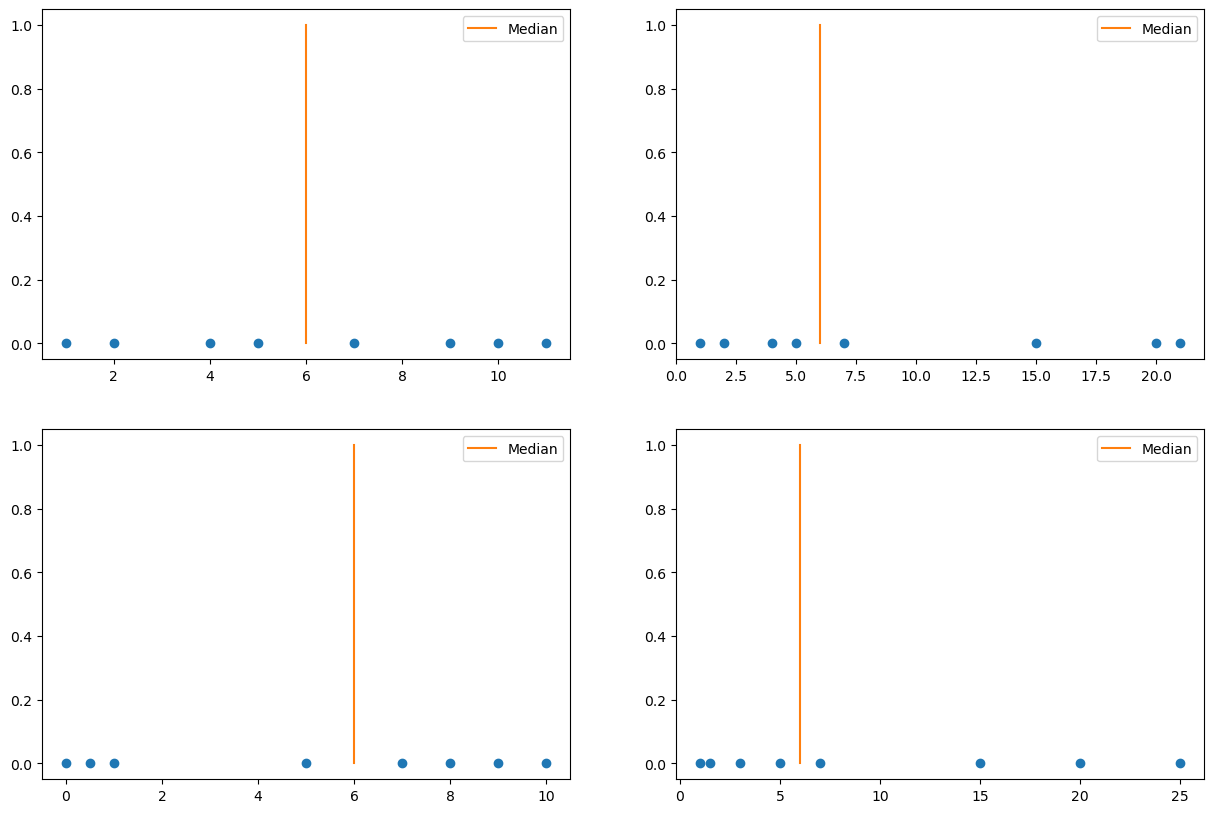

In [89]:
x1 = [1, 2, 4, 5, 7, 9, 10, 11]
x2 = [1, 2, 4, 5, 7, 15, 20, 21]
x3 = [0, 0.5, 1, 5, 7, 8, 9, 10]
x4 = [1, 1.5, 3, 5, 7, 15, 20, 25]
y = [0,0,0,0,0,0,0,0]

fig, axs = plt.subplots(2, 2, figsize=(15,10))

axs[0,0].plot(x1, y, 'o')
axs[0,0].plot([6,6], [0, 1], label='Median')

axs[0,1].plot(x2, y, 'o')
axs[0,1].plot([6,6], [0, 1], label='Median')

axs[1,0].plot(x3, y, 'o')
axs[1,0].plot([6,6], [0, 1], label='Median')

axs[1,1].plot(x4, y, 'o')
axs[1,1].plot([6,6], [0, 1], label='Median')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

In all these data points the median value is exactly the same, however we see some important differences between them: the distance these points have between them and how close they are to they central tendency. Measures of dispersion gives us information regarding how different the values are among themselves. Let's now introduce the most common measures:

<h3> Variance </h3>

One of the most used dispersion measures is the variance, that tells us the mean difference of each value from the arithmetic mean, but note that if we substract each value from the mean and add them up, there will be some positive and negative values that will cancel out. To avoid this problem we square such differences and then find the mean:

$$\sigma^2 = \frac{(\bar{x} - x_{1})^2 + (\bar{x} - x_{2})^2 + ... + (\bar{x} - x_{n})^2}{n}$$

<h3> Standard deviation </h3>

Since the variance squares every value, say we compute this statistic for the ages of $n$ persons, then the variance will be in age squared, and we would loose some interpretability. To solve this problem we use de standard deviation, which is simply computed by applying the square root to th variance and then recover the original units of measure:

$$\sigma = \sqrt{\frac{(\bar{x} - x_{1})^2 + (\bar{x} - x_{2})^2 + ... + (\bar{x} - x_{n})^2}{n}}$$

<h2> Measures of position </h2>

Measures of position tells where a certain data point falls into a given ddata distribution. This is important because sometimes we want to know if a given value is close to the mean, it is unusually high or low. To define the measures of position, we first need to select in how many part we want the distribution to be split. In general terms we call **quantiles** the values that split the distribution; if we split in ten parts we call them **deciles**; if it is in one hundread parts they are call **percentiles**; if it is in four parts they are called **quantiles**.

The methodology to find a given quantile is exactly the same as to find the median, now see that the median is exactly the same as the 50th percentile.

<h2> Practical example </h2>

Now let's see how to describe a dataset using `pandas` and all the statistics we have seen so far. We use the mtcars dataset, which have 32 records extracted from the 1974 Motor Trend US magazine, and gives information on fuel consumption and 10 characteristics regarding the performance of the automobiles. This is a famous dataset used to practice some data science techniques.

In [93]:
df = pd.read_csv('Data/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


By using the `describe()` method in a `pandas` data frame we get all the descriptive statistics:   

In [94]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


The std row refers to the standard deviation, and the 25%, 50% and 75% to the 25th, 50th and 75th percentile, respectively.